In [1]:
#!/bin/bash
import requests
import zipfile

def download_pokemon_dataset():
    url = "https://www.kaggle.com/api/v1/datasets/download/abcsds/pokemon"
    response = requests.get(url)

    if response.status_code == 200:
        with open("pokemon.zip", "wb") as f:
            f.write(response.content)
        print("Dataset downloaded successfully.")
        with zipfile.ZipFile("pokemon.zip", "r") as zip_ref:
            zip_ref.extractall()
        print("Dataset extracted successfully.")
    else:
        print("Failed to download dataset.")

#download_pokemon_dataset()

# Load Dataset

In [2]:
import pandas as pd


pokemon_df = pd.read_csv("pokemon.csv")

# Renomear as colunas
pokemon_df.rename(columns={
    "Type 1": "type_1",
    "Type 2": "type_2",
    "Generation": "generation",
    "Legendary": "legendary",
    "Sp. Atk": "special_attack",
    "Sp. Def": "special_defense",
    "#": "id"
}, inplace=True)

pokemon_df.columns = pokemon_df.columns.str.lower()



# Cores

In [3]:
CORES = {
        "Bug": "#AFBE26FF",
        "Dark": "#0000009A",
        "Dragon": "#7038F8",
        "Electric": "#F8D030",
        "Fairy": "#EE99AC",
        "Fighting": "#C03028",
        "Fire": "#F05630FF",
        "Ghost": "#705898",
        "Grass": "#78C850",
        "Ground": "#E0C068",
        "Ice": "#98D8D8",
        "Normal": "#A8A878",
        "Poison": "#A040A0",
        "Psychic": "#F85888",
        "Rock": "#B8A038",
        "Steel": "#B8B8D0",
        "Water": "#6890F0",
        "Flying": "#A890F0"
    }

# Tipos

## Tipo primario


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import random



def plot_pokemon_types(col: str):
    plt.figure(figsize = (10, 10))
    contagens = pokemon_df[col].value_counts()
    explode = [random.uniform(0, 0.1) for _ in range(len(contagens))]
    contagens.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%', colors = [CORES[tipo] for tipo in contagens.index])
    plt.axis('equal')
    # remover rótulo do eixo y
    plt.ylabel('')
    if col == "type_1":
        plt.title('Distribuição dos Tipos Primários dos Pokémons', fontsize=16, weight='bold')
    else:
        plt.title('Distribuição dos Tipos Secundários dos Pokémons', fontsize=16, weight='bold')

    plt.savefig(f"tipos_pokemon_{col}.png")
    plt.show()
    plt.close()


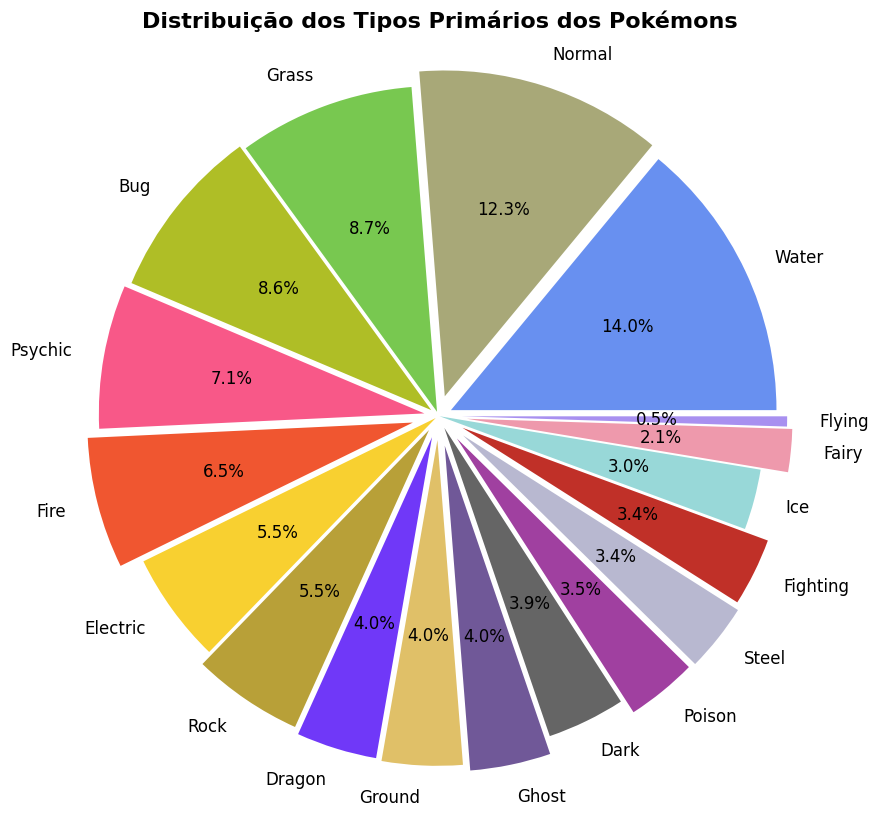

In [5]:
plot_pokemon_types("type_1")

## Tipos secundários


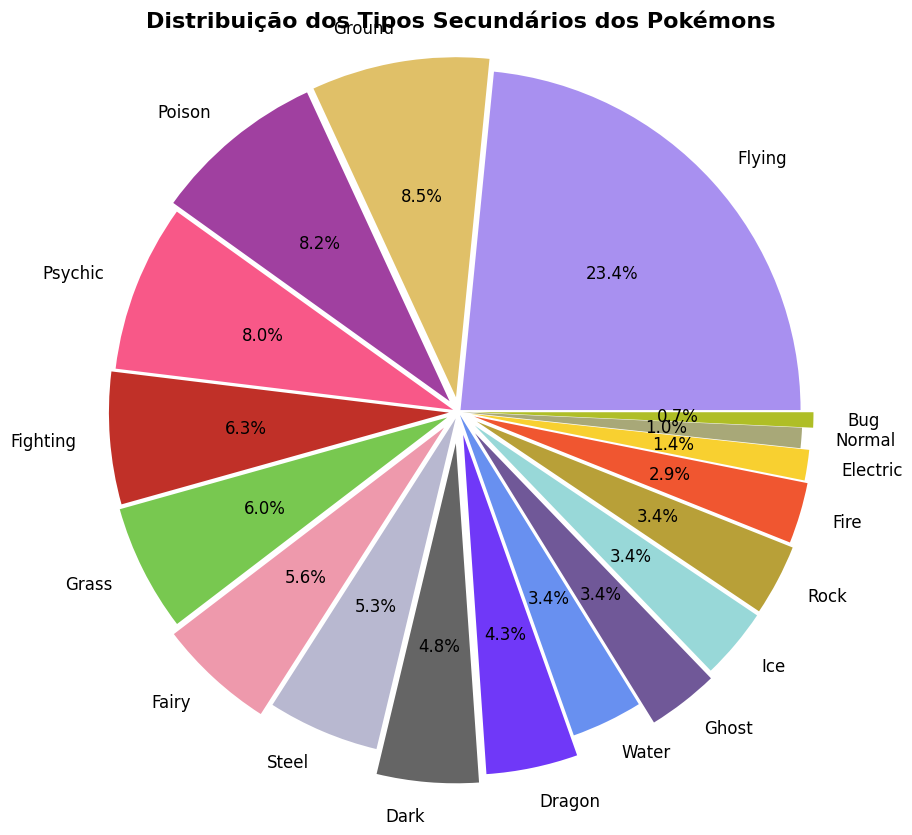

In [6]:
plot_pokemon_types("type_2")

# Mais fortes por geração

## Check

In [7]:

pokemons_by_generation = pokemon_df.groupby('generation')
col = 'hp'
for i in range(1, 7):
    print(pokemons_by_generation.get_group(i).loc[pokemons_by_generation.get_group(i)[col].idxmax()][['name', col]])

name    Chansey
hp          250
Name: 121, dtype: object
name    Blissey
hp          255
Name: 261, dtype: object
name    Wailord
hp          170
Name: 351, dtype: object
name    Drifblim
hp           150
Name: 473, dtype: object
name    Alomomola
hp            165
Name: 655, dtype: object
name    Xerneas
hp          126
Name: 792, dtype: object


In [8]:
def mais_fortes_por_geracao(col: str, title: str):
    pokemons_mais_fortes = pokemon_df.groupby('generation', group_keys=False).apply(lambda x: x.loc[x[col].idxmax()], include_groups=True)

    pokemons_mais_fortes = pokemons_mais_fortes.reset_index(drop=True).sort_values('generation')

    colunas_relevantes = ['name', 'generation', 'attack', 'type_1', 'type_2', 'hp', 'defense', 'speed', 'legendary']
    pokemons_mais_fortes = pokemons_mais_fortes[colunas_relevantes]

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 4]})

    cores_fundo = [CORES.get(tipo, '#CCCCCC') for tipo in pokemons_mais_fortes['type_1']]

    for i, (tipo1, tipo2) in enumerate(reversed(list(zip(pokemons_mais_fortes['type_1'], pokemons_mais_fortes['type_2'])))):
        ax1.barh(i, 0.5, color=CORES.get(tipo1, '#CCCCCC'), height=0.4)
        ax1.text(0.25, i, tipo1, ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        if pd.notna(tipo2):
            ax1.barh(i, 0.5, left=0.5, color=CORES.get(tipo2, '#CCCCCC'), height=0.4)
            ax1.text(0.75, i, tipo2, ha='center', va='center', fontsize=10, fontweight='bold', color='white')

    ax1.set_yticks(range(len(pokemons_mais_fortes)))
    ax1.set_yticklabels(reversed(pokemons_mais_fortes['generation']))
    ax1.set_xlabel('Tipos', fontsize=12)
    ax1.set_ylabel('Geração', fontsize=12)
    ax1.set_xlim(0, 1)
    ax1.set_xticks([])


    sns.barplot(y='generation', x=col, data=pokemons_mais_fortes, orient='h', palette=cores_fundo, ax=ax2, order=pokemons_mais_fortes['generation'])
    for i, v in enumerate(pokemons_mais_fortes[col]):
        ax2.text(v/2, i, pokemons_mais_fortes['name'].iloc[i], color='white', va='center', ha='center', fontsize=10, weight='bold')
        ax2.text(v+5, i, f"{v:.2f}", color='black', va='center', ha='center', fontsize=10)
        if pokemons_mais_fortes['legendary'].iloc[i]:
            ax2.text(v-v+10, i, '[Lendário]', color='yellow', va='center', ha='center', fontsize=10, weight='bold', fontstyle='italic')

    ax2.set_ylabel('')
    # Remover os ticks do eixo y
    ax2.set_yticklabels([])
    ax2.set_xlabel(title, fontsize=12)

    plt.suptitle(f'Pokémons com o Maior {title} por Geração', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"./imagens/pokemons_mais_fortes_com_tipos_{title}.png")
    plt.show()
    plt.close()

## Maior ataque


C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\2703887465.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pokemons_mais_fortes = pokemon_df.groupby('generation', group_keys=False).apply(lambda x: x.loc[x[col].idxmax()], include_groups=True)
C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\2703887465.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='generation', x=col, data=pokemons_mais_fortes, orient='h', palette=cores_fundo, ax=ax2, order=pokemons_mais_fortes['generation'])


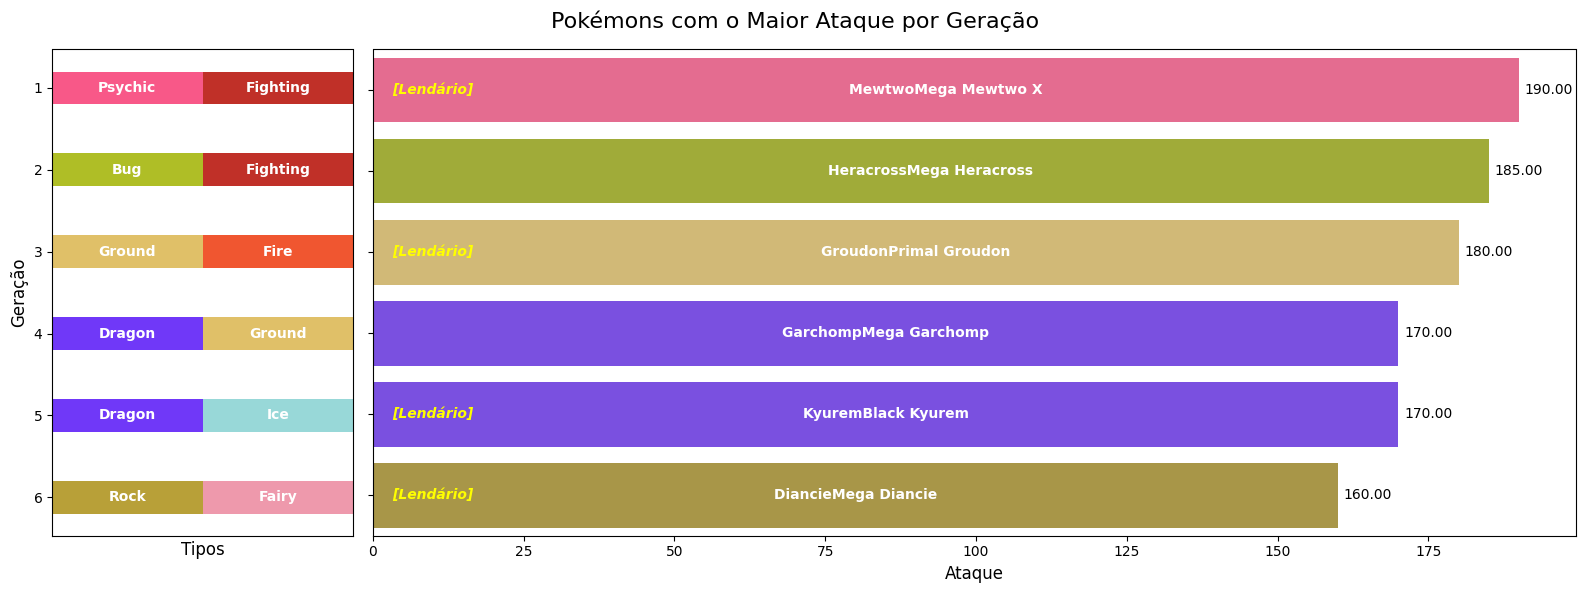

In [9]:
mais_fortes_por_geracao("attack", "Ataque")

## Maior defesa


C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\2703887465.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pokemons_mais_fortes = pokemon_df.groupby('generation', group_keys=False).apply(lambda x: x.loc[x[col].idxmax()], include_groups=True)
C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\2703887465.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='generation', x=col, data=pokemons_mais_fortes, orient='h', palette=cores_fundo, ax=ax2, order=pokemons_mais_fortes['generation'])


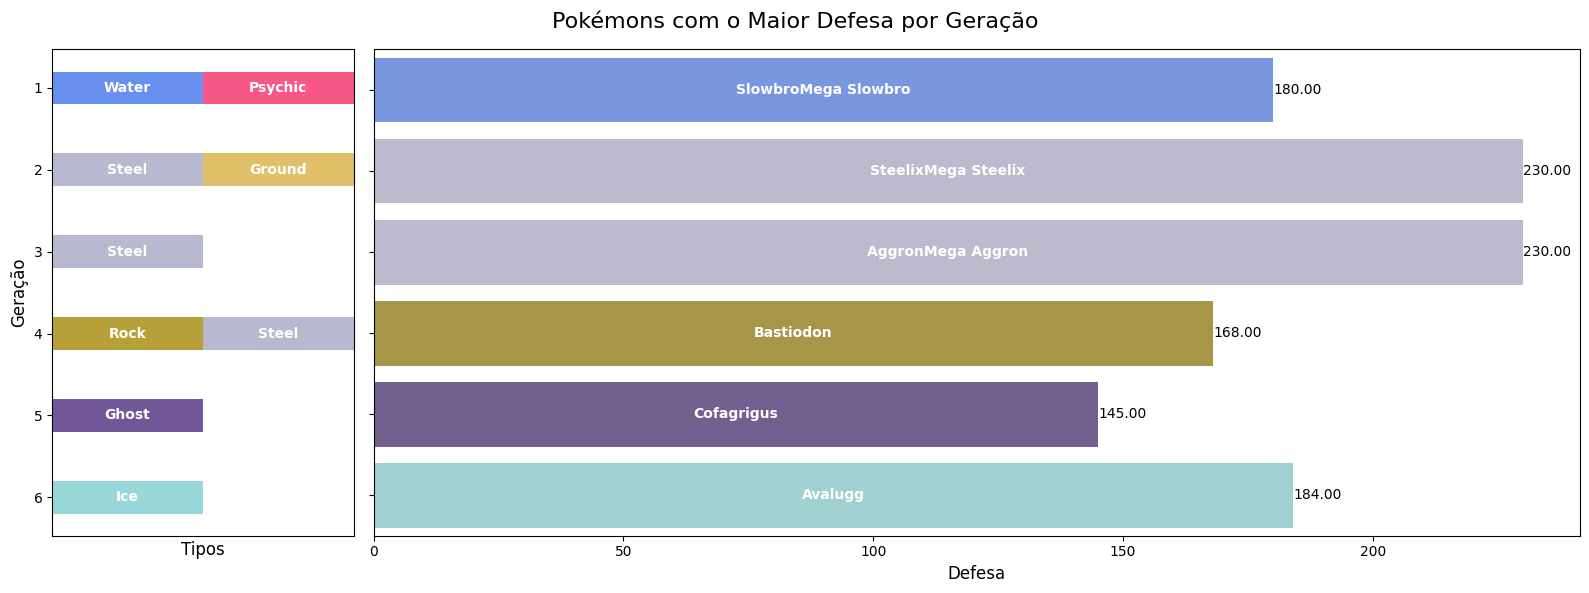

In [10]:
mais_fortes_por_geracao("defense", "Defesa")

## Maior HP





C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\2703887465.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pokemons_mais_fortes = pokemon_df.groupby('generation', group_keys=False).apply(lambda x: x.loc[x[col].idxmax()], include_groups=True)
C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\2703887465.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='generation', x=col, data=pokemons_mais_fortes, orient='h', palette=cores_fundo, ax=ax2, order=pokemons_mais_fortes['generation'])


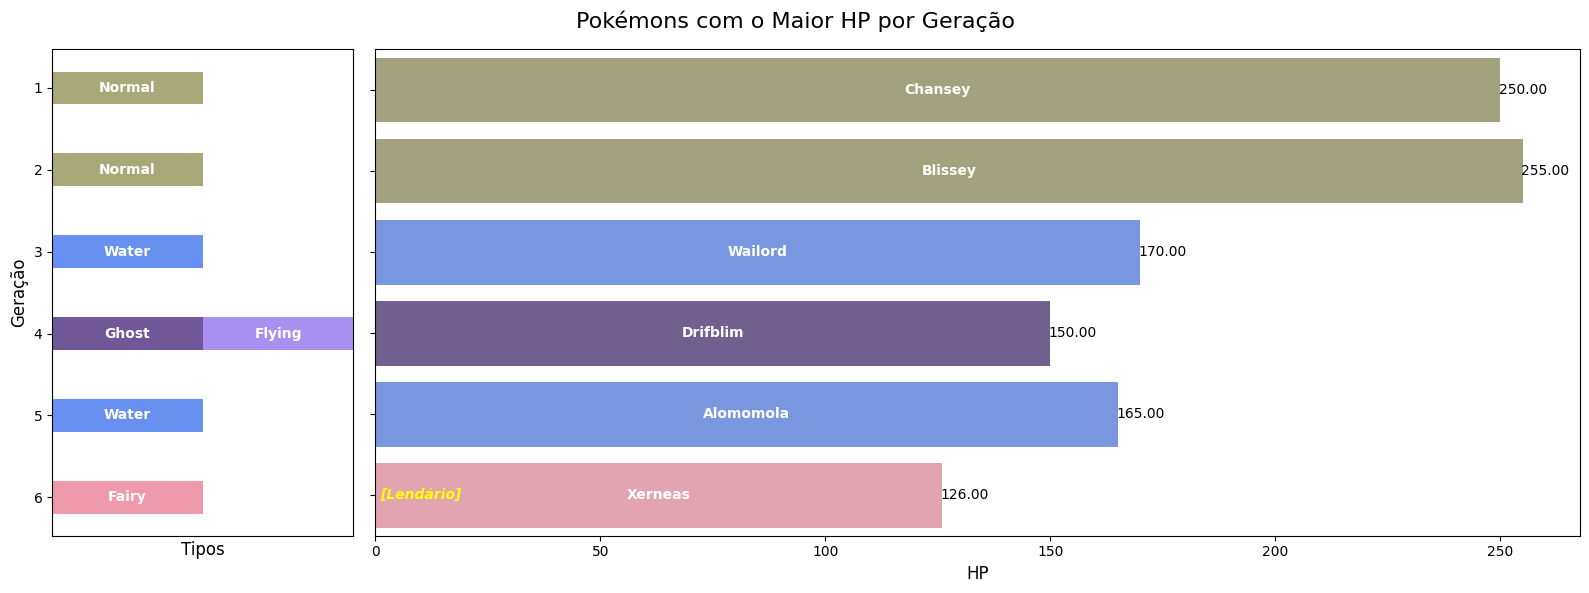

In [11]:
mais_fortes_por_geracao("hp", "HP")

# Media dos atributos por geração








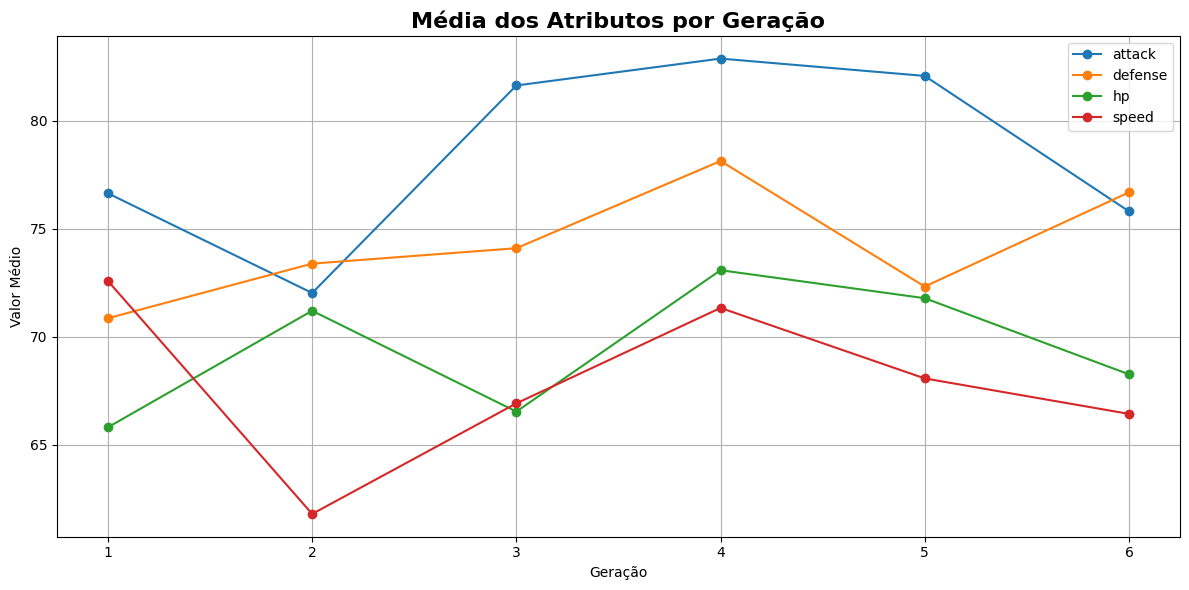

In [12]:
# Agrupando os Pokémon por geração
pokemons_by_generation = pokemon_df.groupby('generation')

atributos_medios = pokemons_by_generation[['attack', 'defense', 'hp', 'speed']].mean()

plt.figure(figsize=(12, 6))
for atributo in ['attack', 'defense', 'hp', 'speed']:
    plt.plot(atributos_medios.index, atributos_medios[atributo], marker='o', label=atributo)

plt.title('Média dos Atributos por Geração', fontsize=16, weight='bold')
plt.xlabel('Geração')
plt.ylabel('Valor Médio')
plt.legend()
plt.grid(True)
plt.savefig("./imagens/media_atributos_por_geracao.png")
plt.tight_layout()
plt.show()
plt.close()


# Mediana dos atributos por geração


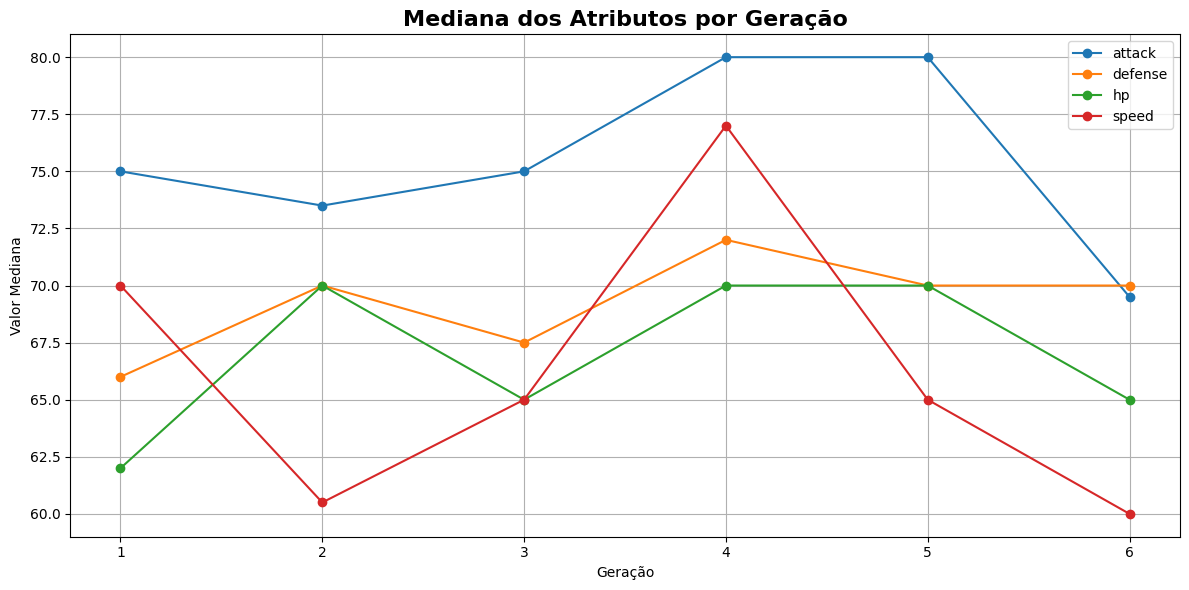

In [13]:
pokemons_by_generation = pokemon_df.groupby('generation')

atributos_medios = pokemons_by_generation[['attack', 'defense', 'hp', 'speed']].median()

plt.figure(figsize=(12, 6))
for atributo in ['attack', 'defense', 'hp', 'speed']:
    plt.plot(atributos_medios.index, atributos_medios[atributo], marker='o', label=atributo)

plt.title('Mediana dos Atributos por Geração', fontsize=16, weight='bold')
plt.xlabel('Geração')
plt.ylabel('Valor Mediana')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./imagens/mediana_atributos_por_geracao.png")
plt.show()
plt.close()

# Soma dos atributos por tipo primário em cada geração


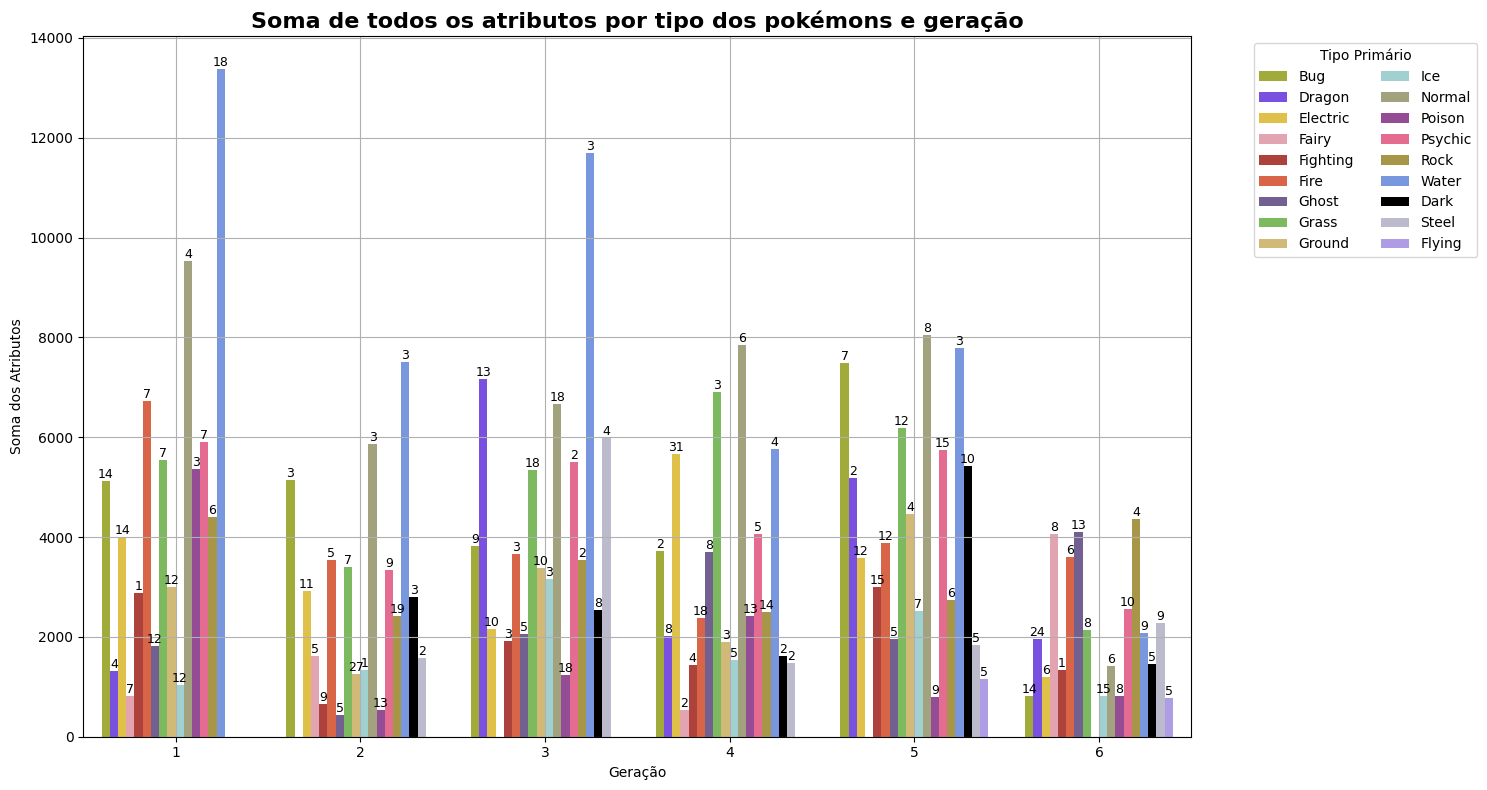

In [14]:
df_pokemons_by_generation_type = pokemon_df.filter(['generation', 'type_1', 'total'])
df_pokemons_by_generation_type_sum = df_pokemons_by_generation_type.groupby(['generation', 'type_1']).sum().reset_index()

df_pokemons_by_generation_type_count = pokemon_df.groupby(['generation', 'type_1']).size().reset_index(name='count')

df_pokemons_by_generation_type_merged = pd.merge(df_pokemons_by_generation_type_sum, df_pokemons_by_generation_type_count, on=['generation', 'type_1'])

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='generation', y='total', hue='type_1', data=df_pokemons_by_generation_type_merged, palette=CORES)

plt.title('Soma de todos os atributos por tipo dos pokémons e geração', fontsize=16, weight='bold')
plt.xlabel('Geração')
plt.ylabel('Soma dos Atributos')
plt.legend(title='Tipo Primário', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=2)
plt.grid(True)
plt.tight_layout()

# Adicionando a quantidade de Pokémon no topo de cada barra
for patch, count in zip(ax.patches, df_pokemons_by_generation_type_merged['count']):
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height
    ax.text(x, y, int(count), ha='center', va='bottom', fontsize=9, color='black')

plt.savefig("./imagens/soma_atributos_por_tipo_primario_geracao.png")
plt.show()
plt.close()

# Media dos atributos por tipo primário em cada geração


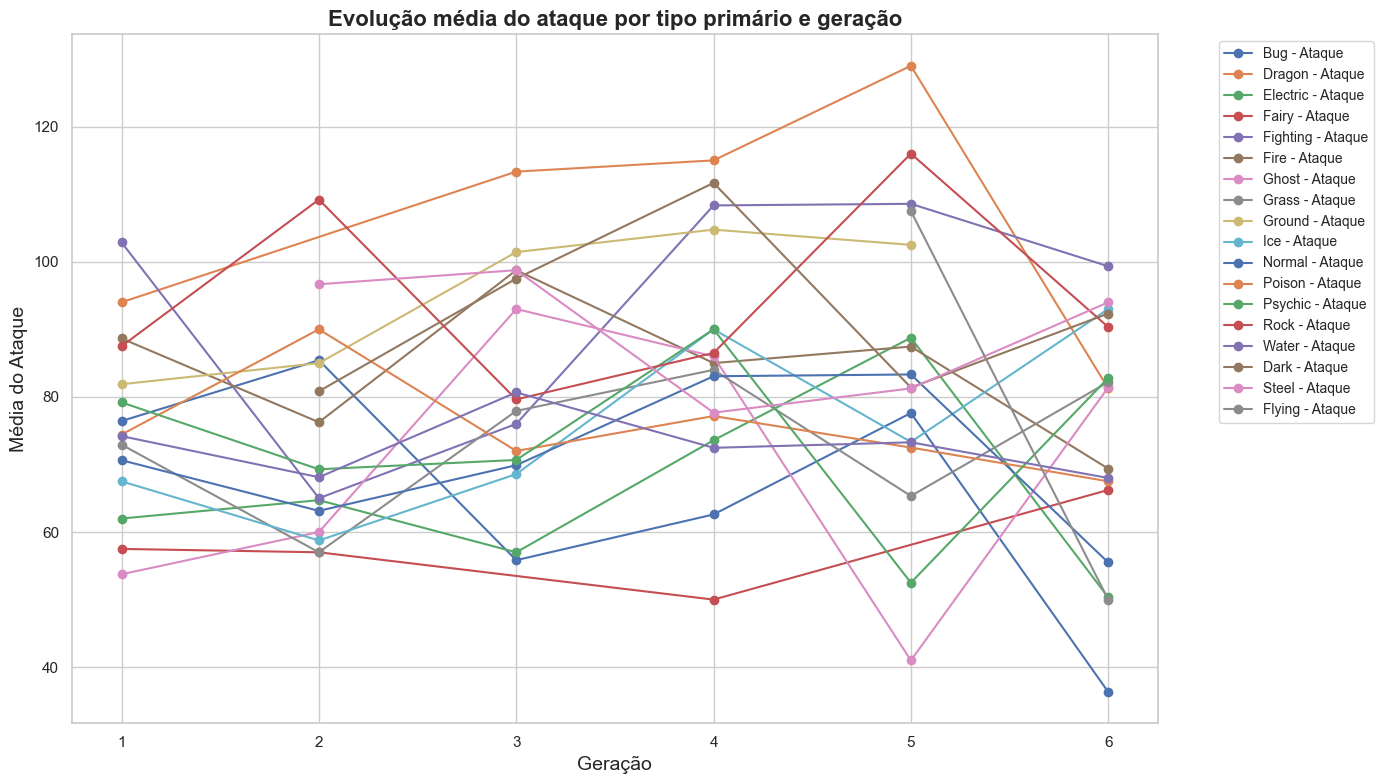

In [15]:
def plot_evolucao_media_tipo_1(df):
    df_agrupado = df.groupby(['generation', 'type_1'])[['attack', 'defense', 'hp', 'speed', 'special_attack', 'special_defense']].mean().reset_index()
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 8))

    for tipo in df_agrupado['type_1'].unique():
        dados_tipo = df_agrupado[df_agrupado['type_1'] == tipo]
        plt.plot(dados_tipo['generation'], dados_tipo['attack'], marker='o', label=f'{tipo} - Ataque')
        #plt.plot(dados_tipo['generation'], dados_tipo['defense'], marker='x', linestyle='--', label=f'{tipo} - Defesa')
        #plt.plot(dados_tipo['generation'], dados_tipo['hp'], marker='s', linestyle=':', label=f'{tipo} - HP')
        #plt.plot(dados_tipo['generation'], dados_tipo['speed'], marker='^', linestyle='-.', label=f'{tipo} - Speed')

    plt.title('Evolução média do ataque por tipo primário e geração', fontsize=16, weight='bold')
    plt.xlabel('Geração', fontsize=14)
    plt.ylabel('Média do Ataque', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.savefig("./imagens/evolucao_media_tipo_1.png")
    plt.show()
    plt.close()

plot_evolucao_media_tipo_1(pokemon_df)

# Soma total dos atributos por tipo primário

C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\3259624253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generation', y='total', data=df_pokemons_by_generation, palette='deep')


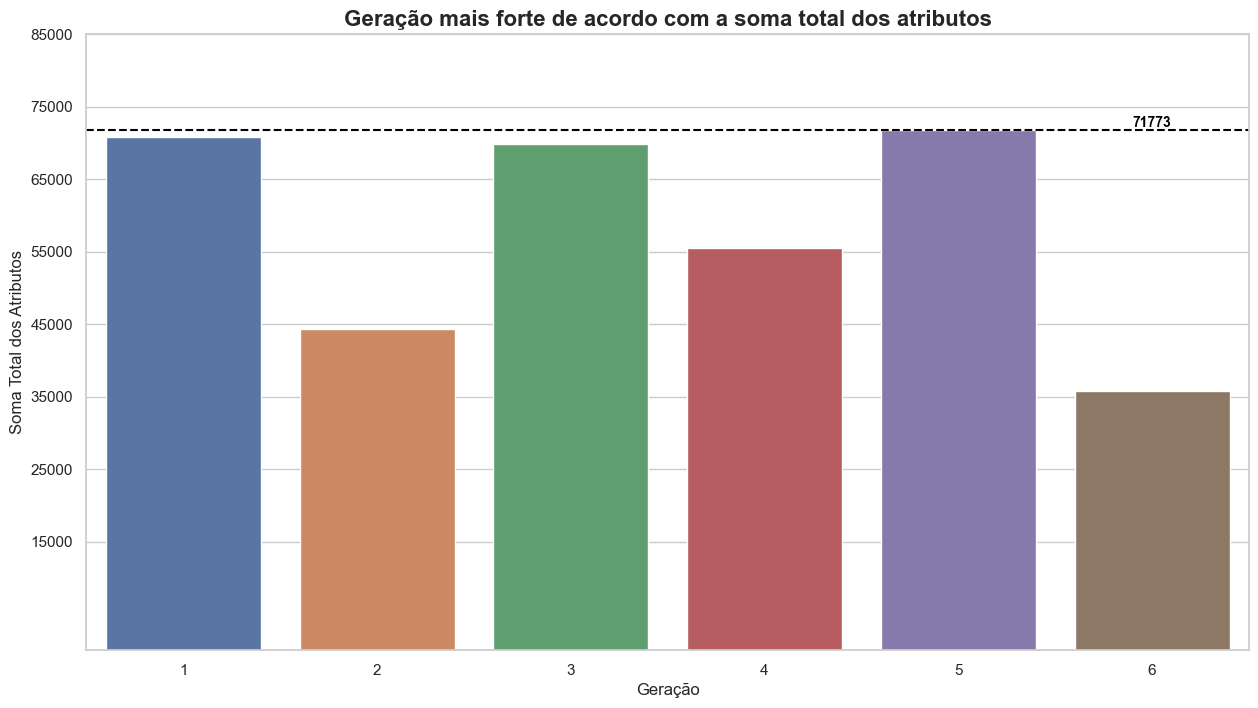

In [16]:
# Filtrando e somando os atributos por geração
df_pokemons_by_generation = pokemon_df.groupby('generation').sum().reset_index()


#sns.histplot(df_pokemons_by_generation, x='generation', y='total_attributes', bins=len(df_pokemons_by_generation['generation'].unique()), kde=True)
plt.figure(figsize=(15, 8))
sns.barplot(x='generation', y='total', data=df_pokemons_by_generation, palette='deep')
plt.title('Geração mais forte de acordo com a soma total dos atributos', fontsize=16, weight='bold')
plt.axhline(df_pokemons_by_generation['total'].max(), color='black', linestyle='--', label='Geração Mais Forte')
plt.text(df_pokemons_by_generation['generation'].iloc[df_pokemons_by_generation['total'].idxmax()], df_pokemons_by_generation['total'].max(), df_pokemons_by_generation['total'].iloc[df_pokemons_by_generation["total"].idxmax()], color='black', ha='center', va='bottom', fontsize=10, weight='bold')
plt.xlabel('Geração')
plt.ylabel('Soma Total dos Atributos')
plt.yticks([15_000, 25_000, 35_000, 45_000, 55_000, 65_000, 75_000, 85_000])
plt.savefig("./imagens/distribuicao_soma_atributos_por_geracao.png")
plt.show()
plt.close()

# Tipos mais fortes da primeira geração até a sexta

C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\3963291283.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_pokemons_by_max_attr = pokemon_df.groupby('type_1').apply(
C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\3963291283.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='type_1', x='total', data=df_pokemons_by_max_attr, palette=CORES, orient='h')


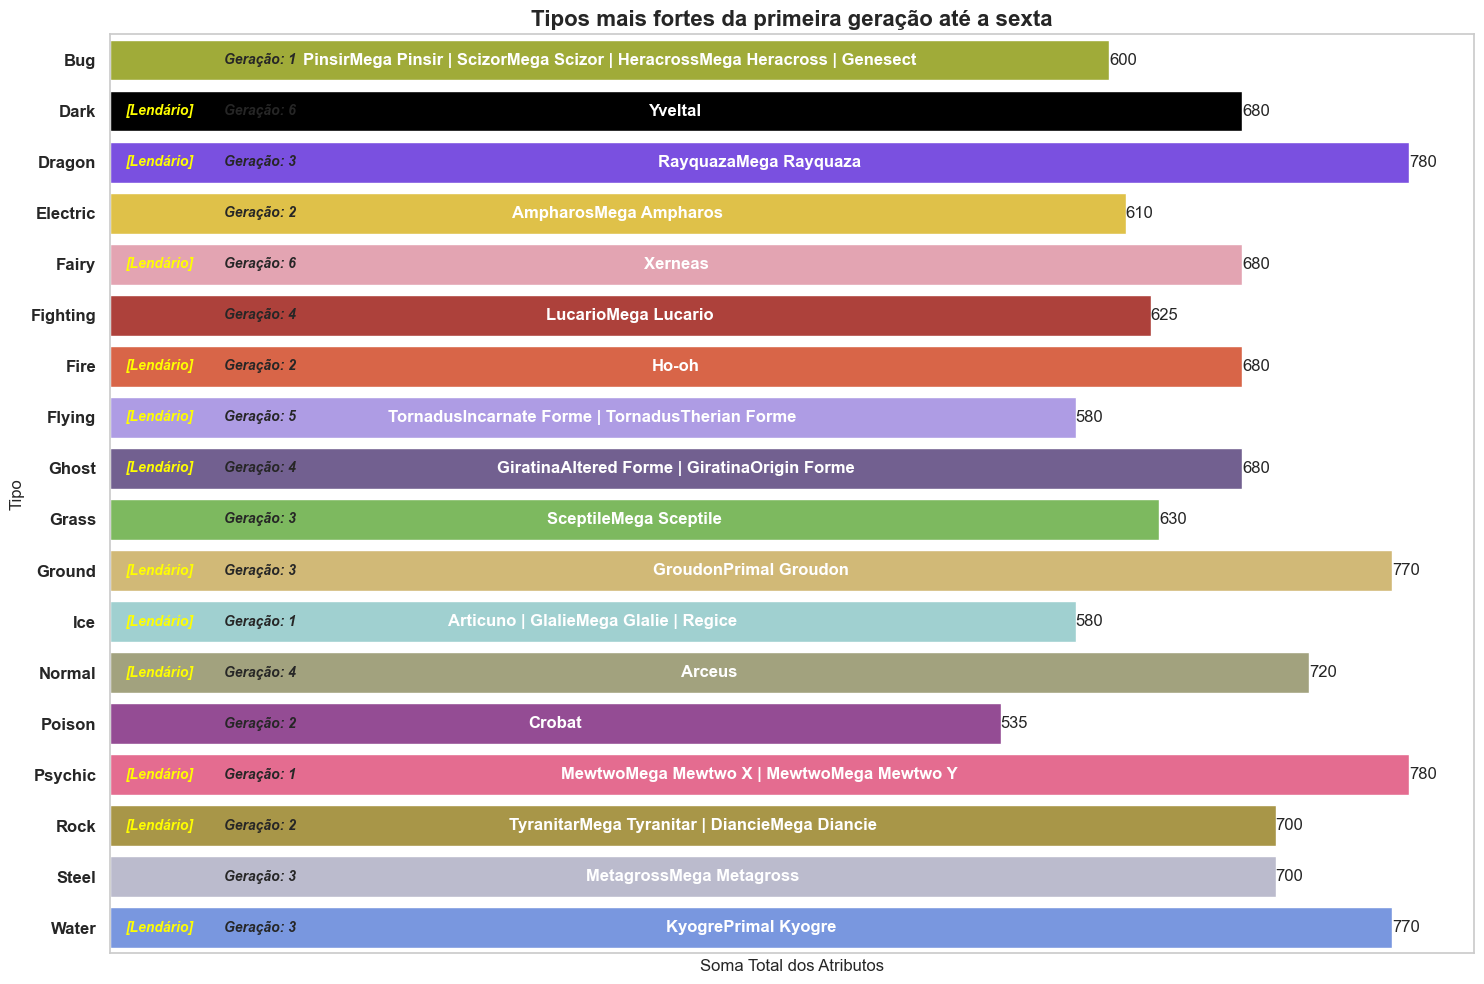

In [17]:
df_pokemons_by_max_attr = pokemon_df.filter(['#', 'generation', 'total', 'type_1', 'name', 'id', 'legendary'])

# Agrupar por 'type_1' e encontrar os Pokémons com o maior 'total'
df_pokemons_by_max_attr = pokemon_df.groupby('type_1').apply(
    lambda x: x[x['total'] == x['total'].max()]
).reset_index(drop=True)

# Agregar os nomes dos Pokémons que possuem o mesmo 'total', separados por '|'
df_pokemons_by_max_attr = df_pokemons_by_max_attr.groupby(['type_1', 'total']).agg({
    'name': ' | '.join,
    'generation': 'first',
    'legendary': 'any'
}).reset_index()

plt.figure(figsize=(15, 10))
ax = sns.barplot(y='type_1', x='total', data=df_pokemons_by_max_attr, palette=CORES, orient='h')
plt.title('Tipos mais fortes da primeira geração até a sexta', fontsize=16, weight='bold')
plt.ylabel('Tipo')
plt.xlabel('Soma Total dos Atributos')

for i, row in df_pokemons_by_max_attr.iterrows():
    v = row['total']
    nomes = row['name']
    geracao = row['generation']
    lendario = row['legendary']

    ax.text(v, i, str(int(v)), va='center', ha='left')
    ax.text(v/2, i, nomes, va='center', ha='center', fontsize=12, weight='bold', color='white')
    if lendario:
        ax.text(v-v+30, i, '[Lendário]', color='yellow', va='center', ha='center', fontsize=10, weight='bold', fontstyle='italic')
    ax.text(v-v+30*3, i, f"Geração: {geracao}", va='center', ha='center', fontsize=10, weight='bold', fontstyle='italic')


plt.yticks(fontsize=12, weight='bold')
plt.xticks([])
plt.tight_layout()
plt.savefig("./imagens/tipos_mais_fortes_por_geracao.png")
plt.show()
plt.close()

In [18]:
pokemon_df.loc[pokemon_df['type_1'] == 'Bug'].sort_values('total', ascending=False)


,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
717,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False
229,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
698,637,Volcarona,Bug,Fire,550,85,60,65,135,105,100,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,664,Scatterbug,Bug,NaN,200,38,35,40,27,25,35,6,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


# Preprocessamento dos dados


In [19]:
import pandas as pd


pokemon_df = pd.read_csv("pokemon.csv")

# Renomear as colunas
pokemon_df.rename(columns={
    "Type 1": "type_1",
    "Type 2": "type_2",
    "Generation": "generation",
    "Legendary": "legendary",
    "Sp. Atk": "special_attack",
    "Sp. Def": "special_defense",
    "#": "id"
}, inplace=True)

pokemon_df.columns = pokemon_df.columns.str.lower()

pokemon_df['type_2'].fillna('None', inplace=True)
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               800 non-null    int64 
 1   name             800 non-null    object
 2   type_1           800 non-null    object
 3   type_2           800 non-null    object
 4   total            800 non-null    int64 
 5   hp               800 non-null    int64 
 6   attack           800 non-null    int64 
 7   defense          800 non-null    int64 
 8   special_attack   800 non-null    int64 
 9   special_defense  800 non-null    int64 
 10  speed            800 non-null    int64 
 11  generation       800 non-null    int64 
 12  legendary        800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


C:\Users\lzandrade\AppData\Local\Temp\ipykernel_15604\2326650729.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df['type_2'].fillna('None', inplace=True)


In [20]:
pokemon_df['legendary'] = pokemon_df['legendary'].astype('int64')
cat_cols = pokemon_df.select_dtypes(include=['object', 'bool']).columns.tolist()
num_cols = pokemon_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_cols, num_cols

(['name', 'type_1', 'type_2'],
 ['id',
  'total',
  'hp',
  'attack',
  'defense',
  'special_attack',
  'special_defense',
  'speed',
  'generation',
  'legendary'])

In [21]:
for col in cat_cols:
    pokemon_df[col] = pokemon_df[col].astype('category')
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               800 non-null    int64   
 1   name             800 non-null    category
 2   type_1           800 non-null    category
 3   type_2           800 non-null    category
 4   total            800 non-null    int64   
 5   hp               800 non-null    int64   
 6   attack           800 non-null    int64   
 7   defense          800 non-null    int64   
 8   special_attack   800 non-null    int64   
 9   special_defense  800 non-null    int64   
 10  speed            800 non-null    int64   
 11  generation       800 non-null    int64   
 12  legendary        800 non-null    int64   
dtypes: category(3), int64(10)
memory usage: 105.7 KB


# Modelo

In [22]:

COLS_TO_DROP = ['name', 'id']


X = pokemon_df[num_cols + cat_cols].drop('legendary', axis=1)
y = pokemon_df['legendary'].values.ravel()

for col in COLS_TO_DROP:
    if col in cat_cols:
        cat_cols.remove(col)

X.drop(columns=COLS_TO_DROP, inplace=True, errors='ignore')


In [23]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   total            800 non-null    int64   
 1   hp               800 non-null    int64   
 2   attack           800 non-null    int64   
 3   defense          800 non-null    int64   
 4   special_attack   800 non-null    int64   
 5   special_defense  800 non-null    int64   
 6   speed            800 non-null    int64   
 7   generation       800 non-null    int64   
 8   type_1           800 non-null    category
 9   type_2           800 non-null    category
dtypes: category(2), int64(8)
memory usage: 53.1 KB


In [24]:
y.shape

(800,)

In [27]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
from optuna.samplers import TPESampler
import numpy as np


def objective(trial):
   params = {
      'loss_function': 'Logloss',
      'eval_metric': 'AUC',
      'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
      'iterations': 10,
      'depth': trial.suggest_int('depth', 6, 12),
      'random_strength':0,
      'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-1, 1.0, log=True),
      'task_type':'CPU',
      'random_seed':42,
      'verbose':False,
      'cat_features': cat_cols
   }


   model = CatBoostClassifier(**params)
   skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
   cv_splits = skf.split(X, y)
   scores = list()
   for index, (train_index, test_index) in enumerate(cv_splits):
      X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[test_index]
      y_train_fold, y_val_fold = y[train_index], y[test_index]
      X_train_pool = Pool(X_train_fold, y_train_fold, cat_features=cat_cols)
      X_val_pool = Pool(X_val_fold, y_val_fold, cat_features=cat_cols)
      model.fit(X_train_pool, eval_set=X_val_pool, early_stopping_rounds=50)
      y_pred = model.predict_proba(X_val_pool)[:, 1]
      score = roc_auc_score(y_val_fold, y_pred)
      scores.append(score)
      print(f"Fold: {index + 1} score: {scores[-1]}")
   return np.mean(scores)


sqlite_db = "sqlite:///pikachu.db"
study_name = "go_pikachu"

study = optuna.create_study(storage=sqlite_db, study_name=study_name,
                                sampler=TPESampler(
                                   n_startup_trials=35,
                                   multivariate=True,
                                   seed=0),
                                direction="maximize",
                                pruner=optuna.pruners.MedianPruner(
                                   n_warmup_steps=5,
                                   interval_steps=1
                                ),
                                load_if_exists=True)

study.optimize(objective, n_trials=10)

c:\Users\lzandrade\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\samplers\_tpe\sampler.py:319: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2024-10-14 20:49:52,666] Using an existing study with name 'go_pikachu' instead of creating a new one.


Fold: 1 score: 0.9830163043478262
Fold: 2 score: 0.9769021739130436
Fold: 3 score: 0.9877717391304348


[I 2024-10-14 20:49:55,256] Trial 45 finished with value: 0.9842706739235253 and parameters: {'learning_rate': 0.016037916545281517, 'depth': 10, 'l2_leaf_reg': 0.6765261336162061}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9893924783027965
Fold: 1 score: 0.9690896739130436
Fold: 2 score: 0.9755434782608696
Fold: 3 score: 0.9867527173913042


[I 2024-10-14 20:49:57,923] Trial 46 finished with value: 0.9807571070570067 and parameters: {'learning_rate': 0.013125855037632818, 'depth': 10, 'l2_leaf_reg': 0.7486194319023554}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9916425586628095
Fold: 1 score: 0.9714673913043478
Fold: 2 score: 0.975203804347826
Fold: 3 score: 0.9853940217391305


[I 2024-10-14 20:50:00,490] Trial 47 finished with value: 0.9809269440135284 and parameters: {'learning_rate': 0.013284786191331896, 'depth': 10, 'l2_leaf_reg': 0.6798118162800802}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9916425586628095
Fold: 1 score: 0.9599184782608696
Fold: 2 score: 0.9816576086956521
Fold: 3 score: 0.9894701086956521


[I 2024-10-14 20:50:03,960] Trial 48 finished with value: 0.9803507485273154 and parameters: {'learning_rate': 0.01376617837432657, 'depth': 11, 'l2_leaf_reg': 0.7071895454624378}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9903567984570877
Fold: 1 score: 0.9612771739130435
Fold: 2 score: 0.9786005434782609
Fold: 3 score: 0.985733695652174


[I 2024-10-14 20:50:08,354] Trial 49 finished with value: 0.9791527729008567 and parameters: {'learning_rate': 0.013396129853244875, 'depth': 9, 'l2_leaf_reg': 0.675858828395172}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9909996785599485
Fold: 1 score: 0.9595788043478262
Fold: 2 score: 0.9745244565217391
Fold: 3 score: 0.9887907608695652


[I 2024-10-14 20:50:12,386] Trial 50 finished with value: 0.9786341451004851 and parameters: {'learning_rate': 0.01040286293662846, 'depth': 11, 'l2_leaf_reg': 0.8184717758526368}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9916425586628094
Fold: 1 score: 0.9599184782608695
Fold: 2 score: 0.977921195652174
Fold: 3 score: 0.9845448369565217


[I 2024-10-14 20:50:14,924] Trial 51 finished with value: 0.9783460473573785 and parameters: {'learning_rate': 0.01594588335107, 'depth': 9, 'l2_leaf_reg': 0.5990528642285569}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9909996785599485
Fold: 1 score: 0.960258152173913
Fold: 2 score: 0.9809782608695652
Fold: 3 score: 0.9881114130434783


[I 2024-10-14 20:50:18,092] Trial 52 finished with value: 0.9800868761617262 and parameters: {'learning_rate': 0.01448332377122109, 'depth': 11, 'l2_leaf_reg': 0.46709473446682215}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9909996785599485
Fold: 1 score: 0.9660326086956522
Fold: 2 score: 0.9772418478260869
Fold: 3 score: 0.9847146739130435


[I 2024-10-14 20:50:20,709] Trial 53 finished with value: 0.9803900823515437 and parameters: {'learning_rate': 0.012224619475975182, 'depth': 10, 'l2_leaf_reg': 0.4239159004345909}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9935711989713919
Fold: 1 score: 0.9786005434782609
Fold: 2 score: 0.9741847826086956
Fold: 3 score: 0.9887907608695652


[I 2024-10-14 20:50:23,323] Trial 54 finished with value: 0.9833850214176904 and parameters: {'learning_rate': 0.0244568554834671, 'depth': 10, 'l2_leaf_reg': 0.8291413523510333}. Best is trial 45 with value: 0.9842706739235253.


Fold: 4 score: 0.9919639987142398


In [28]:
print(f"Melhor valor encontrado: {study.best_value}")
print(f"Melhores parâmetros: {study.best_params}")
print(f"Melhor trial: {study.best_trial}")
print(f"Número total de trials: {len(study.trials)}")

valores_trials = [trial.value for trial in study.trials if trial.value is not None]
print(f"Média dos valores dos trials: {np.mean(valores_trials):.4f}")
print(f"Desvio padrão dos valores dos trials: {np.std(valores_trials):.4f}")
print(f"Valor mínimo dos trials: {np.min(valores_trials):.4f}")
print(f"Valor máximo dos trials: {np.max(valores_trials):.4f}")

importancia_parametros = optuna.importance.get_param_importances(study)
print("\nImportância dos parâmetros:")
for param, importancia in importancia_parametros.items():
    print(f"{param}: {importancia:.4f}")

Melhor valor encontrado: 0.9842706739235253
Melhores parâmetros: {'learning_rate': 0.016037916545281517, 'depth': 10, 'l2_leaf_reg': 0.6765261336162061}
Melhor trial: FrozenTrial(number=45, state=1, values=[0.9842706739235253], datetime_start=datetime.datetime(2024, 10, 14, 20, 49, 52, 692218), datetime_complete=datetime.datetime(2024, 10, 14, 20, 49, 55, 239775), params={'learning_rate': 0.016037916545281517, 'depth': 10, 'l2_leaf_reg': 0.6765261336162061}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.3, log=True, low=0.01, step=None), 'depth': IntDistribution(high=12, log=False, low=6, step=1), 'l2_leaf_reg': FloatDistribution(high=1.0, log=True, low=0.1, step=None)}, trial_id=46, value=None)
Número total de trials: 55
Média dos valores dos trials: 0.7237
Desvio padrão dos valores dos trials: 0.3476
Valor mínimo dos trials: 0.2088
Valor máximo dos trials: 0.9843

Importância dos parâmetros:
learning_rate: 0.4739
l2_l

In [26]:
optuna.visualization.plot_optimization_history(study)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [1, 2, 3, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                    22, 23, 24, 25, 26, 27, 28, 29, 35, 36, 37, 38, 39, 40, 41, 42,
                    43, 44],
              'y': [0.23625, 0.23625, 0.26125000000000004, 0.23625,
                    0.26125000000000004, 0.21999999999999997, 0.22624999999999998,
                    0.215, 0.21999999999999997, 0.20875000000000002, 0.24,
                    0.22874999999999998, 0.22875, 0.235, 0.23249999999999998,
                    0.96375, 0.9624999999999999, 0.9575, 0.9549999999999998,
                    0.96375, 0.9575, 0.9575, 0.9624999999999999,
                    0.9650000000000001, 0.96125, 0.9602581521739131,
                    0.9731657608695652, 0.9697690217391304, 0.9650135869565216,
                    0.9639945652173914, 0.9738451086956521, 0.9663722826086957,
                    0.9680706521739131, 0.967391304347826, 0.9592391304347827]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
              'y': [-inf, 0.23625, 0.23625, 0.26125000000000004,
                    0.26125000000000004, 0.26125000000000004, 0.26125000000000004,
                    0.26125000000000004, 0.26125000000000004, 0.26125000000000004,
                    0.26125000000000004, 0.26125000000000004, 0.26125000000000004,
                    0.26125000000000004, 0.26125000000000004, 0.26125000000000004,
                    0.26125000000000004, 0.26125000000000004, 0.26125000000000004,
                    0.26125000000000004, 0.96375, 0.96375, 0.96375, 0.96375,
                    0.96375, 0.96375, 0.96375, 0.96375, 0.9650000000000001,
                    0.9650000000000001, 0.9650000000000001, 0.9650000000000001,
                    0.9650000000000001, 0.9650000000000001, 0.9650000000000001,
                    0.9650000000000001, 0.9731657608695652, 0.9731657608695652,
                    0.9731657608695652, 0.9731657608695652, 0.9738451086956521,
                    0.9738451086956521, 0.9738451086956521, 0.9738451086956521,
                    0.9738451086956521]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})